In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating synthetic training data                                                                                                              
Xtrain = np.array([-4,-3,-2,-1,1,3])
Xtrain=Xtrain.reshape(len(Xtrain),1)
ytrain = np.sin(Xtrain)

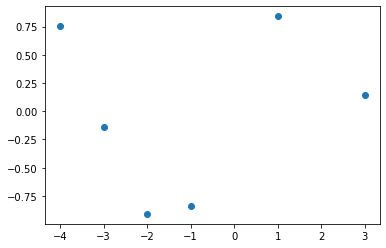

In [3]:
plt.scatter(Xtrain, ytrain)
#plt.ylim(-3,3)
plt.show()

In [35]:
#generate a grid of test points
n = 51
Xtest = np.linspace(-5,5,n).reshape(-1,1)

In [36]:
Xtest

array([[-5. ],
       [-4.8],
       [-4.6],
       [-4.4],
       [-4.2],
       [-4. ],
       [-3.8],
       [-3.6],
       [-3.4],
       [-3.2],
       [-3. ],
       [-2.8],
       [-2.6],
       [-2.4],
       [-2.2],
       [-2. ],
       [-1.8],
       [-1.6],
       [-1.4],
       [-1.2],
       [-1. ],
       [-0.8],
       [-0.6],
       [-0.4],
       [-0.2],
       [ 0. ],
       [ 0.2],
       [ 0.4],
       [ 0.6],
       [ 0.8],
       [ 1. ],
       [ 1.2],
       [ 1.4],
       [ 1.6],
       [ 1.8],
       [ 2. ],
       [ 2.2],
       [ 2.4],
       [ 2.6],
       [ 2.8],
       [ 3. ],
       [ 3.2],
       [ 3.4],
       [ 3.6],
       [ 3.8],
       [ 4. ],
       [ 4.2],
       [ 4.4],
       [ 4.6],
       [ 4.8],
       [ 5. ]])

## build the GP

In [ ]:
# define kernel function
'''
def kernel(a,b,bw):
    sqdist = np.sum(a**2,1).reshape(-1,1)+ np.sum(b**2,1) -2*a.dot(b.T)
    return np.exp(-sqdist/2./bw)
'''

In [7]:
def kernel(X,Y,bw):
    sq_dists = (X - Y.T)**2
    # Compute the Gaussian kernel matrix
    K = np.exp(-sq_dists / (2 * bw**2))
    return K

In [18]:
# fix the bandwidth
bandwidth=0.5

In [37]:
# obtaining K_**: covariance matrix of the function values at test points                                                                                                                                  
K_ss = kernel(Xtest,Xtest,bandwidth)
L_ss = np.linalg.cholesky(K_ss + 1.E-6*np.eye(n))

### plot 10 prior functions

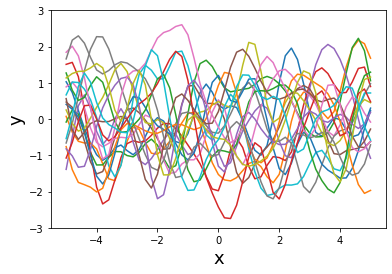

In [38]:
n_samples = 20
f_prior = 0 + np.dot(L_ss,np.random.normal(size=(n,n_samples)))

plt.plot(Xtest,f_prior)                                                                                                                           
plt.ylim(-3,3)                                                                                                                                    
plt.xlabel('x',fontsize=18)                                                                                                                       
plt.ylabel('y',fontsize=18)
plt.show()

In [39]:
# Obtaining K and K_* : further elements of the block covariance                                                                                                             
K = kernel(Xtrain,Xtrain,bandwidth)
K_s = kernel(Xtrain,Xtest,bandwidth)

In [40]:
K_s.shape

(6, 51)

### build posterior predictive mean and variance

In [41]:
# vector of mean at test points                                                                                                                   
mu = np.dot(K_s.T,np.dot(np.linalg.inv(K),ytrain))

In [42]:
# variance at test points
Var= K_ss - np.dot(K_s.T,np.dot(np.linalg.inv(K),K_s))

#standard deviation
std=np.sqrt(np.diag(Var))

/var/folders/xl/lvvxp_154vz5xrgm57jpp5lw0000gn/T/ipykernel_7641/2394633570.py:5: RuntimeWarning: invalid value encountered in sqrt
  std=np.sqrt(np.diag(Var))


In [37]:
std

array([0.99063056, 0.95878515, 0.86592438, 0.66745702, 0.34891267,
       0.03908215, 0.38697025, 0.57625266, 0.53829687, 0.28851506,
       0.075141  , 0.40845683, 0.57925733, 0.52035366, 0.25485492,
       0.11235903, 0.43542974, 0.58684678, 0.50746396, 0.22598817,
       0.1576956 , 0.52173978, 0.78197036, 0.92235342, 0.97559653,
       0.97588874, 0.92366164, 0.78539615, 0.52779844, 0.16218297,
       0.24127079, 0.58922928, 0.82192672, 0.9396411 , 0.97954592,
       0.9704111 , 0.90426966, 0.74393817, 0.46183354, 0.08149674,
       0.31801695, 0.64584875, 0.85389206, 0.95383145, 0.98917743,
       0.99815736, 0.99977434, 0.99998018, 0.99999875, 0.99999994])

### plot 10 posterior functions

In [27]:
n_samples = 100

# Cholesky of the posterior
L = np.linalg.cholesky(Var +  1.E-6*np.eye(n))

# samples
f_post = mu + np.dot(L,np.random.normal(size=(n,n_samples)))


In [28]:
f_post.shape

(50, 100)

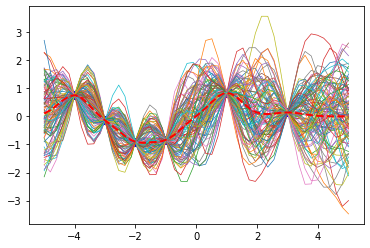

In [29]:
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post, lw=0.7)
#plt.fill_between(Xtest.flatten(), mu.flatten()-1*std, mu.flatten()+1*std, color="#dddddd")
plt.plot(Xtest, mu, '--', lw=2, color='red')
#plt.axis([-5, 5, -3, 3])
#plt.ylim()
plt.show()

In [30]:
Xtrain

array([[-4],
       [-3],
       [-2],
       [-1],
       [ 1],
       [ 3]])

In [31]:
Xtest

array([[-5.        ],
       [-4.79591837],
       [-4.59183673],
       [-4.3877551 ],
       [-4.18367347],
       [-3.97959184],
       [-3.7755102 ],
       [-3.57142857],
       [-3.36734694],
       [-3.16326531],
       [-2.95918367],
       [-2.75510204],
       [-2.55102041],
       [-2.34693878],
       [-2.14285714],
       [-1.93877551],
       [-1.73469388],
       [-1.53061224],
       [-1.32653061],
       [-1.12244898],
       [-0.91836735],
       [-0.71428571],
       [-0.51020408],
       [-0.30612245],
       [-0.10204082],
       [ 0.10204082],
       [ 0.30612245],
       [ 0.51020408],
       [ 0.71428571],
       [ 0.91836735],
       [ 1.12244898],
       [ 1.32653061],
       [ 1.53061224],
       [ 1.73469388],
       [ 1.93877551],
       [ 2.14285714],
       [ 2.34693878],
       [ 2.55102041],
       [ 2.75510204],
       [ 2.95918367],
       [ 3.16326531],
       [ 3.36734694],
       [ 3.57142857],
       [ 3.7755102 ],
       [ 3.97959184],
       [ 4